<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9715348	total: 53.4ms	remaining: 53.3s
1:	learn: 0.9391860	total: 53.8ms	remaining: 26.9s
2:	learn: 0.9075726	total: 54.4ms	remaining: 18.1s
3:	learn: 0.8769048	total: 54.7ms	remaining: 13.6s
4:	learn: 0.8520205	total: 54.9ms	remaining: 10.9s
5:	learn: 0.8242497	total: 55.3ms	remaining: 9.16s
6:	learn: 0.8016727	total: 55.5ms	remaining: 7.87s
7:	learn: 0.7784662	total: 56ms	remaining: 6.94s
8:	learn: 0.7530286	total: 56.5ms	remaining: 6.22s
9:	learn: 0.7288986	total: 56.9ms	remaining: 5.64s
10:	learn: 0.7060925	total: 57.3ms	remaining: 5.15s
11:	learn: 0.6854075	total: 57.7ms	remaining: 4.75s
12:	learn: 0.6654122	total: 58ms	remaining: 4.4s
13:	learn: 0.6450886	total: 58.4ms	remaining: 4.11s
14:	learn: 0.6246292	total: 58.7ms	remaining: 3.85s
15:	learn: 0.6042006	total: 58.9ms	remaining: 3.62s
16:	learn: 0.5853518	total: 59.1ms	remaining: 3.42s
17:	learn: 0.5680733	total: 59.3ms	remaining: 3.23s
18:	learn: 0.5519837	total: 59.6ms	remaining: 3.0

23:	learn: 0.4750171	total: 64.8ms	remaining: 2.63s
24:	learn: 0.4603252	total: 66.2ms	remaining: 2.58s
25:	learn: 0.4463202	total: 66.8ms	remaining: 2.5s
26:	learn: 0.4334546	total: 67.4ms	remaining: 2.43s
27:	learn: 0.4195254	total: 67.6ms	remaining: 2.35s
28:	learn: 0.4077771	total: 67.9ms	remaining: 2.27s
29:	learn: 0.3952413	total: 68.8ms	remaining: 2.22s
30:	learn: 0.3832232	total: 69.5ms	remaining: 2.17s
31:	learn: 0.3723791	total: 70.4ms	remaining: 2.13s
32:	learn: 0.3615642	total: 71.1ms	remaining: 2.08s
33:	learn: 0.3509400	total: 71.8ms	remaining: 2.04s
34:	learn: 0.3415807	total: 72.5ms	remaining: 2s
35:	learn: 0.3323922	total: 72.8ms	remaining: 1.95s
36:	learn: 0.3232313	total: 73.1ms	remaining: 1.9s
37:	learn: 0.3148682	total: 73.3ms	remaining: 1.86s
38:	learn: 0.3061716	total: 73.5ms	remaining: 1.81s
39:	learn: 0.2978371	total: 74.5ms	remaining: 1.79s
40:	learn: 0.2892430	total: 75.2ms	remaining: 1.76s
41:	learn: 0.2818777	total: 76.6ms	remaining: 1.75s
42:	learn: 0.2745

187:	learn: 0.0413334	total: 152ms	remaining: 655ms
188:	learn: 0.0412190	total: 152ms	remaining: 653ms
189:	learn: 0.0410944	total: 153ms	remaining: 652ms
190:	learn: 0.0409677	total: 153ms	remaining: 650ms
191:	learn: 0.0407116	total: 154ms	remaining: 648ms
192:	learn: 0.0405410	total: 154ms	remaining: 646ms
193:	learn: 0.0404231	total: 155ms	remaining: 644ms
194:	learn: 0.0401977	total: 156ms	remaining: 642ms
195:	learn: 0.0400541	total: 156ms	remaining: 640ms
196:	learn: 0.0397690	total: 156ms	remaining: 638ms
197:	learn: 0.0396328	total: 157ms	remaining: 636ms
198:	learn: 0.0395103	total: 157ms	remaining: 634ms
199:	learn: 0.0393945	total: 158ms	remaining: 632ms
200:	learn: 0.0392743	total: 158ms	remaining: 630ms
201:	learn: 0.0391700	total: 159ms	remaining: 628ms
202:	learn: 0.0390957	total: 160ms	remaining: 626ms
203:	learn: 0.0390207	total: 160ms	remaining: 625ms
204:	learn: 0.0389250	total: 161ms	remaining: 623ms
205:	learn: 0.0386572	total: 161ms	remaining: 621ms
206:	learn: 

288:	learn: 0.0298770	total: 207ms	remaining: 510ms
289:	learn: 0.0298208	total: 208ms	remaining: 510ms
290:	learn: 0.0297255	total: 209ms	remaining: 509ms
291:	learn: 0.0296661	total: 210ms	remaining: 508ms
292:	learn: 0.0296119	total: 211ms	remaining: 508ms
293:	learn: 0.0295634	total: 212ms	remaining: 508ms
294:	learn: 0.0294967	total: 212ms	remaining: 507ms
295:	learn: 0.0294301	total: 213ms	remaining: 506ms
296:	learn: 0.0293158	total: 213ms	remaining: 505ms
297:	learn: 0.0292674	total: 214ms	remaining: 505ms
298:	learn: 0.0291606	total: 215ms	remaining: 503ms
299:	learn: 0.0291129	total: 215ms	remaining: 502ms
300:	learn: 0.0290727	total: 216ms	remaining: 501ms
301:	learn: 0.0290336	total: 217ms	remaining: 501ms
302:	learn: 0.0289786	total: 217ms	remaining: 500ms
303:	learn: 0.0289156	total: 218ms	remaining: 499ms
304:	learn: 0.0288307	total: 219ms	remaining: 499ms
305:	learn: 0.0287997	total: 220ms	remaining: 498ms
306:	learn: 0.0287401	total: 220ms	remaining: 497ms
307:	learn: 

468:	learn: 0.0216258	total: 299ms	remaining: 338ms
469:	learn: 0.0216017	total: 300ms	remaining: 339ms
470:	learn: 0.0215766	total: 301ms	remaining: 338ms
471:	learn: 0.0215523	total: 302ms	remaining: 338ms
472:	learn: 0.0215109	total: 303ms	remaining: 337ms
473:	learn: 0.0214827	total: 303ms	remaining: 336ms
474:	learn: 0.0214540	total: 303ms	remaining: 335ms
475:	learn: 0.0214073	total: 304ms	remaining: 334ms
476:	learn: 0.0213879	total: 304ms	remaining: 334ms
477:	learn: 0.0213681	total: 305ms	remaining: 333ms
478:	learn: 0.0213274	total: 306ms	remaining: 332ms
479:	learn: 0.0213095	total: 306ms	remaining: 332ms
480:	learn: 0.0212895	total: 306ms	remaining: 331ms
481:	learn: 0.0212511	total: 307ms	remaining: 330ms
482:	learn: 0.0212100	total: 307ms	remaining: 329ms
483:	learn: 0.0211855	total: 307ms	remaining: 327ms
484:	learn: 0.0211636	total: 308ms	remaining: 327ms
485:	learn: 0.0211384	total: 308ms	remaining: 326ms
486:	learn: 0.0211200	total: 308ms	remaining: 325ms
487:	learn: 

587:	learn: 0.0189575	total: 352ms	remaining: 247ms
588:	learn: 0.0189463	total: 352ms	remaining: 246ms
589:	learn: 0.0189274	total: 352ms	remaining: 245ms
590:	learn: 0.0189090	total: 353ms	remaining: 244ms
591:	learn: 0.0188968	total: 353ms	remaining: 243ms
592:	learn: 0.0188842	total: 353ms	remaining: 242ms
593:	learn: 0.0188676	total: 356ms	remaining: 243ms
594:	learn: 0.0188433	total: 356ms	remaining: 243ms
595:	learn: 0.0188275	total: 357ms	remaining: 242ms
596:	learn: 0.0188207	total: 358ms	remaining: 241ms
597:	learn: 0.0187929	total: 358ms	remaining: 241ms
598:	learn: 0.0187722	total: 358ms	remaining: 240ms
599:	learn: 0.0187622	total: 359ms	remaining: 239ms
600:	learn: 0.0187486	total: 359ms	remaining: 238ms
601:	learn: 0.0187346	total: 359ms	remaining: 238ms
602:	learn: 0.0187282	total: 360ms	remaining: 237ms
603:	learn: 0.0187069	total: 360ms	remaining: 236ms
604:	learn: 0.0186969	total: 361ms	remaining: 236ms
605:	learn: 0.0186728	total: 361ms	remaining: 235ms
606:	learn: 

745:	learn: 0.0162731	total: 438ms	remaining: 149ms
746:	learn: 0.0162616	total: 439ms	remaining: 149ms
747:	learn: 0.0162540	total: 439ms	remaining: 148ms
748:	learn: 0.0162467	total: 440ms	remaining: 147ms
749:	learn: 0.0162370	total: 440ms	remaining: 147ms
750:	learn: 0.0162166	total: 440ms	remaining: 146ms
751:	learn: 0.0161881	total: 440ms	remaining: 145ms
752:	learn: 0.0161810	total: 442ms	remaining: 145ms
753:	learn: 0.0161724	total: 442ms	remaining: 144ms
754:	learn: 0.0161549	total: 442ms	remaining: 144ms
755:	learn: 0.0161375	total: 443ms	remaining: 143ms
756:	learn: 0.0161253	total: 443ms	remaining: 142ms
757:	learn: 0.0161065	total: 443ms	remaining: 142ms
758:	learn: 0.0160949	total: 444ms	remaining: 141ms
759:	learn: 0.0160783	total: 444ms	remaining: 140ms
760:	learn: 0.0160700	total: 444ms	remaining: 139ms
761:	learn: 0.0160520	total: 444ms	remaining: 139ms
762:	learn: 0.0160468	total: 445ms	remaining: 138ms
763:	learn: 0.0160312	total: 445ms	remaining: 138ms
764:	learn: 

857:	learn: 0.0148498	total: 491ms	remaining: 81.2ms
858:	learn: 0.0148406	total: 494ms	remaining: 81ms
859:	learn: 0.0148337	total: 494ms	remaining: 80.5ms
860:	learn: 0.0148253	total: 496ms	remaining: 80.1ms
861:	learn: 0.0148018	total: 496ms	remaining: 79.5ms
862:	learn: 0.0147964	total: 497ms	remaining: 78.9ms
863:	learn: 0.0147940	total: 497ms	remaining: 78.3ms
864:	learn: 0.0147896	total: 498ms	remaining: 77.7ms
865:	learn: 0.0147852	total: 498ms	remaining: 77.1ms
866:	learn: 0.0147745	total: 499ms	remaining: 76.6ms
867:	learn: 0.0147718	total: 500ms	remaining: 76ms
868:	learn: 0.0147640	total: 500ms	remaining: 75.4ms
869:	learn: 0.0147527	total: 501ms	remaining: 74.8ms
870:	learn: 0.0147315	total: 501ms	remaining: 74.2ms
871:	learn: 0.0147255	total: 501ms	remaining: 73.6ms
872:	learn: 0.0147130	total: 502ms	remaining: 73.1ms
873:	learn: 0.0147052	total: 503ms	remaining: 72.5ms
874:	learn: 0.0146947	total: 504ms	remaining: 72ms
875:	learn: 0.0146918	total: 505ms	remaining: 71.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.02211139308421872
ABC Pre-generator MAE 0.07429347185599555


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

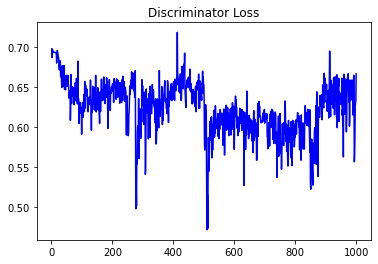

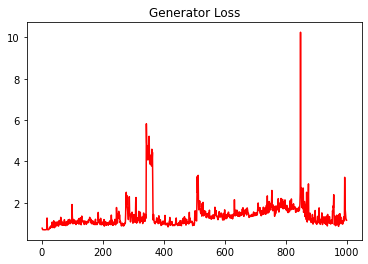

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.06794602395458654


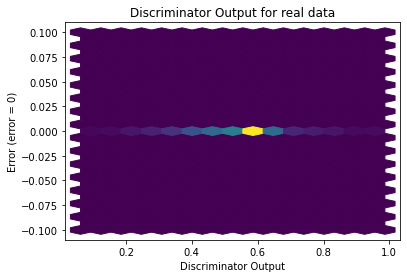

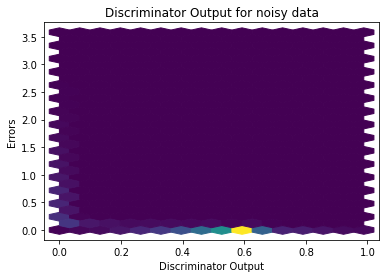

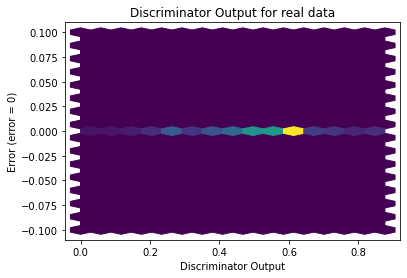

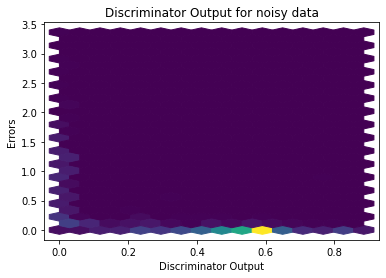

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())